# **Functions**

In [318]:
# Função para obter os dados da API
def get_data(url):
    try:
        # Fazendo a requisição GET
        response = requests.get(url)
        response.raise_for_status()  # Levanta um HTTPError para status de resposta de erro
        # Convertendo a resposta em JSON
        data = response.json()
        # Carregando os dados em um DataFrame do pandas
        df = pd.DataFrame(data)
        return df
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except Exception as err:
        print(f"Other error occurred: {err}")
    return None

#-----------------------------------------------------------
# Função para obter coordenadas a partir do nome da cidade
def get_coordinates(city, delay=1):
    """
    Obtém coordenadas geográficas para uma cidade, com atraso entre as requisições para evitar bloqueios.
    
    :param city: Nome da cidade para geocodificação.
    :param delay: Tempo de atraso entre as requisições em segundos (default é 1 segundo).
    :return: Tupla contendo latitude e longitude, ou None se não for possível obter coordenadas.
    """
    try:
        location = geolocator.geocode(f"{city}, USA")
        if location:
            # Atraso entre as requisições
            time.sleep(delay)
            return location.latitude, location.longitude
    except Exception as e:
        print(f"Error: {e}")
    
    # Atraso entre as requisições
    time.sleep(delay)
    return None

# **Libraries**

In [319]:
import requests
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import folium
from folium import plugins
from geopy.geocoders import Nominatim

# **Loading Data**

## Products

In [320]:
# URL da API para obter todos os produtos
url_products = 'https://fakestoreapi.com/products'

df_products = get_data(url_products)
df_products.head()

,id,title,price,description,category,image,rating
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,"{'rate': 3.9, 'count': 120}"
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,"{'rate': 4.1, 'count': 259}"
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,"{'rate': 4.7, 'count': 500}"
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,"{'rate': 2.1, 'count': 430}"
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,"{'rate': 4.6, 'count': 400}"


In [321]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20 non-null     int64  
 1   title        20 non-null     object 
 2   price        20 non-null     float64
 3   description  20 non-null     object 
 4   category     20 non-null     object 
 5   image        20 non-null     object 
 6   rating       20 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ KB


In [322]:
df_products.to_csv('data/df_products.csv')
print('df_products salvo!')

df_products salvo!


## Carts

In [323]:
# URL da API para obter todos os carrinhos
url_carts = 'https://fakestoreapi.com/carts'

df_carts = get_data(url_carts)
df_carts.head()

,id,userId,date,products,__v
0,1,1,2020-03-02T00:00:00.000Z,"[{'productId': 1, 'quantity': 4}, {'productId'...",0
1,2,1,2020-01-02T00:00:00.000Z,"[{'productId': 2, 'quantity': 4}, {'productId'...",0
2,3,2,2020-03-01T00:00:00.000Z,"[{'productId': 1, 'quantity': 2}, {'productId'...",0
3,4,3,2020-01-01T00:00:00.000Z,"[{'productId': 1, 'quantity': 4}]",0
4,5,3,2020-03-01T00:00:00.000Z,"[{'productId': 7, 'quantity': 1}, {'productId'...",0


In [324]:
df_carts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7 non-null      int64 
 1   userId    7 non-null      int64 
 2   date      7 non-null      object
 3   products  7 non-null      object
 4   __v       7 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 412.0+ bytes


In [325]:
df_carts.to_csv('data/df_carts.csv')
print('df_carts salvo!')

df_carts salvo!


## Users

In [326]:
url_users = 'https://fakestoreapi.com/users'
df_users = get_data(url_users)
df_users.head()

,address,id,email,username,password,name,phone,__v
0,"{'geolocation': {'lat': '-37.3159', 'long': '8...",1,john@gmail.com,johnd,m38rmF$,"{'firstname': 'john', 'lastname': 'doe'}",1-570-236-7033,0
1,"{'geolocation': {'lat': '-37.3159', 'long': '8...",2,morrison@gmail.com,mor_2314,83r5^_,"{'firstname': 'david', 'lastname': 'morrison'}",1-570-236-7033,0
2,"{'geolocation': {'lat': '40.3467', 'long': '-3...",3,kevin@gmail.com,kevinryan,kev02937@,"{'firstname': 'kevin', 'lastname': 'ryan'}",1-567-094-1345,0
3,"{'geolocation': {'lat': '50.3467', 'long': '-2...",4,don@gmail.com,donero,ewedon,"{'firstname': 'don', 'lastname': 'romer'}",1-765-789-6734,0
4,"{'geolocation': {'lat': '40.3467', 'long': '-4...",5,derek@gmail.com,derek,jklg*_56,"{'firstname': 'derek', 'lastname': 'powell'}",1-956-001-1945,0


In [327]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   10 non-null     object
 1   id        10 non-null     int64 
 2   email     10 non-null     object
 3   username  10 non-null     object
 4   password  10 non-null     object
 5   name      10 non-null     object
 6   phone     10 non-null     object
 7   __v       10 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 772.0+ bytes


In [328]:
df_users.to_csv('data/df_users.csv')
print('df_users salvo!')

df_users salvo!


# **Data Cleaning**

- Check column types (esp. datetime)
- Check for nulls and duplicates
- Split columns if necessary

In [329]:
# Load saved data
df_products = pd.read_csv('data/df_products.csv', index_col=0)
df_carts = pd.read_csv('data/df_carts.csv', index_col=0)
df_users = pd.read_csv('data/df_users.csv', index_col=0)

## Data Cleaning - Products

In [330]:
df_products.head()

,id,title,price,description,category,image,rating
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,"{'rate': 3.9, 'count': 120}"
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,"{'rate': 4.1, 'count': 259}"
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,"{'rate': 4.7, 'count': 500}"
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,"{'rate': 2.1, 'count': 430}"
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,"{'rate': 4.6, 'count': 400}"


### Checking column types

In [331]:
df_products.dtypes

id               int64
title           object
price          float64
description     object
category        object
image           object
rating          object
dtype: object

### Checking sizes

In [332]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20 non-null     int64  
 1   title        20 non-null     object 
 2   price        20 non-null     float64
 3   description  20 non-null     object 
 4   category     20 non-null     object 
 5   image        20 non-null     object 
 6   rating       20 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ KB


### Checking null values and duplicated rows

In [333]:
df_products.isnull().sum()

id             0
title          0
price          0
description    0
category       0
image          0
rating         0
dtype: int64

In [334]:
print(f"O número de linhas duplicadas é: {df_products.duplicated().sum()}")

O número de linhas duplicadas é: 0


### Split columns

- split 'rating' column into 2 new columns: avg_rating and count_ratings
- delete old 'rating' column
- its easier to perform calculations with those 2 metrics separated.

In [335]:
# Garantindo que a coluna 'rating' seja convertida para dicionário p/poder aplicar lambda
df_products['rating'] = df_products['rating'].apply(eval)

# Extraindo valores da coluna 'rating' e criando novas colunas
df_products['avg_rating'] = df_products['rating'].apply(lambda x: x['rate'])
df_products['count_ratings'] = df_products['rating'].apply(lambda x: x['count'])

# Removendo a coluna antiga 'rating'
df_products = df_products.drop(columns=['rating'])

# Exibindo as primeiras linhas do DataFrame para verificar
df_products.head()

,id,title,price,description,category,image,avg_rating,count_ratings
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,3.9,120
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,4.1,259
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,4.7,500
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,2.1,430
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,4.6,400


### Saving cleaned dataset

In [336]:
df_products.to_csv('data/df_products_cleaned.csv', index=False)

## Data Cleaning - Carts

In [337]:
df_carts = pd.read_csv('data/df_carts.csv', index_col=0)
df_carts.head()

,id,userId,date,products,__v
0,1,1,2020-03-02T00:00:00.000Z,"[{'productId': 1, 'quantity': 4}, {'productId'...",0
1,2,1,2020-01-02T00:00:00.000Z,"[{'productId': 2, 'quantity': 4}, {'productId'...",0
2,3,2,2020-03-01T00:00:00.000Z,"[{'productId': 1, 'quantity': 2}, {'productId'...",0
3,4,3,2020-01-01T00:00:00.000Z,"[{'productId': 1, 'quantity': 4}]",0
4,5,3,2020-03-01T00:00:00.000Z,"[{'productId': 7, 'quantity': 1}, {'productId'...",0


### Checking types

In [338]:
df_carts.dtypes

id           int64
userId       int64
date        object
products    object
__v          int64
dtype: object

In [339]:
# Alterando coluna 'date' para formato 'datetime'
# df_carts['date'] = pd.to_datetime(df_carts['date']).dt.strftime('%Y-%m-%d')
df_carts['date'] = pd.to_datetime(df_carts['date'])

In [340]:
df_carts.dtypes

id                        int64
userId                    int64
date        datetime64[ns, UTC]
products                 object
__v                       int64
dtype: object

### Checking null values and duplicated rows

In [341]:
# Contando valores nulos por coluna
df_carts.isnull().sum()

id          0
userId      0
date        0
products    0
__v         0
dtype: int64

In [342]:
print(f"O número de linhas duplicadas é: {df_carts.duplicated().sum()}")

O número de linhas duplicadas é: 0


### Columns transformations

In [343]:
# Verificando se a coluna '__v' tem algum valor diferente
df_carts['__v'].unique()

array([0])

In [344]:
# Como ela não tem, será descartada
df_carts.drop(columns='__v', inplace=True)
df_carts.columns

Index(['id', 'userId', 'date', 'products'], dtype='object')

In [345]:
df1 = df_carts.copy()

# Garantindo que a coluna 'products' seja convertida para listas de dicionários
df1['products'] = df1['products'].apply(ast.literal_eval)

# Criando colunas para cada produto de 1 a 20
for product_id in range(1, 21):
    df1[f'product_{product_id}'] = df1['products'].apply(
        lambda products_list: sum(product['quantity'] for product in products_list if product['productId'] == product_id)
    )

# Removendo a coluna original 'products'
df1 = df1.drop(columns=['products'])

# Exibindo as primeiras linhas do DataFrame para verificar
df1.head()

,id,userId,date,product_1,product_2,product_3,product_4,product_5,product_6,product_7,...,product_11,product_12,product_13,product_14,product_15,product_16,product_17,product_18,product_19,product_20
0,1,1,2020-03-02 00:00:00+00:00,4,1,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,2020-01-02 00:00:00+00:00,10,4,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2,2020-03-01 00:00:00+00:00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3,2020-01-01 00:00:00+00:00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3,2020-03-01 00:00:00+00:00,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Saving cleaned dataset

In [346]:
df1.to_csv('data/df_carts_cleaned.csv', index=False)

## Data Cleaning - Users

In [347]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   10 non-null     object
 1   id        10 non-null     int64 
 2   email     10 non-null     object
 3   username  10 non-null     object
 4   password  10 non-null     object
 5   name      10 non-null     object
 6   phone     10 non-null     object
 7   __v       10 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 720.0+ bytes


In [348]:
df_users.head()

,address,id,email,username,password,name,phone,__v
0,"{'geolocation': {'lat': '-37.3159', 'long': '8...",1,john@gmail.com,johnd,m38rmF$,"{'firstname': 'john', 'lastname': 'doe'}",1-570-236-7033,0
1,"{'geolocation': {'lat': '-37.3159', 'long': '8...",2,morrison@gmail.com,mor_2314,83r5^_,"{'firstname': 'david', 'lastname': 'morrison'}",1-570-236-7033,0
2,"{'geolocation': {'lat': '40.3467', 'long': '-3...",3,kevin@gmail.com,kevinryan,kev02937@,"{'firstname': 'kevin', 'lastname': 'ryan'}",1-567-094-1345,0
3,"{'geolocation': {'lat': '50.3467', 'long': '-2...",4,don@gmail.com,donero,ewedon,"{'firstname': 'don', 'lastname': 'romer'}",1-765-789-6734,0
4,"{'geolocation': {'lat': '40.3467', 'long': '-4...",5,derek@gmail.com,derek,jklg*_56,"{'firstname': 'derek', 'lastname': 'powell'}",1-956-001-1945,0


### Checking types

In [349]:
df_users.dtypes

address     object
id           int64
email       object
username    object
password    object
name        object
phone       object
__v          int64
dtype: object

### Checking null values and duplicated rows

In [350]:
# Contando valores nulos por coluna
df_users.isnull().sum()

address     0
id          0
email       0
username    0
password    0
name        0
phone       0
__v         0
dtype: int64

In [351]:
print(f"O número de linhas duplicadas é: {df_users.duplicated().sum()}")

O número de linhas duplicadas é: 0


### Column transformations

- Split 'address' column to extract 'lat' and 'long' data, as well other geolocation data
- Transform column 'name' to show only the complete name
- Delete '__v' column

In [352]:
df1 = df_users.copy()

# Convertendo a coluna 'address' de string para dicionário
df1['address'] = df1['address'].apply(ast.literal_eval)

# Extraindo e criando as novas colunas
df1['lat'] = df1['address'].apply(lambda x: float(x['geolocation']['lat']))
df1['long'] = df1['address'].apply(lambda x: float(x['geolocation']['long']))
df1['city'] = df1['address'].apply(lambda x: x['city'])
df1['street'] = df1['address'].apply(lambda x: x['street'])
df1['number'] = df1['address'].apply(lambda x: int(x['number']))
df1['zipcode'] = df1['address'].apply(lambda x: x['zipcode'])

# Removendo a coluna original 'address'
df1 = df1.drop(columns=['address'])

# Ajustando as colunas 'city' e 'street' para ter a primeira letra de cada palavra em maiúscula
df1['city'] = df1['city'].str.title()
df1['street'] = df1['street'].str.title()

# Exibindo as primeiras linhas do DataFrame para verificar
df1.head()

,id,email,username,password,name,phone,__v,lat,long,city,street,number,zipcode
0,1,john@gmail.com,johnd,m38rmF$,"{'firstname': 'john', 'lastname': 'doe'}",1-570-236-7033,0,-37.3159,81.1496,Kilcoole,New Road,7682,12926-3874
1,2,morrison@gmail.com,mor_2314,83r5^_,"{'firstname': 'david', 'lastname': 'morrison'}",1-570-236-7033,0,-37.3159,81.1496,Kilcoole,Lovers Ln,7267,12926-3874
2,3,kevin@gmail.com,kevinryan,kev02937@,"{'firstname': 'kevin', 'lastname': 'ryan'}",1-567-094-1345,0,40.3467,-30.1310,Cullman,Frances Ct,86,29567-1452
3,4,don@gmail.com,donero,ewedon,"{'firstname': 'don', 'lastname': 'romer'}",1-765-789-6734,0,50.3467,-20.1310,San Antonio,Hunters Creek Dr,6454,98234-1734
4,5,derek@gmail.com,derek,jklg*_56,"{'firstname': 'derek', 'lastname': 'powell'}",1-956-001-1945,0,40.3467,-40.1310,San Antonio,Adams St,245,80796-1234


In [353]:
# Deixando apenas o nome completo na coluna 'name'
df1['name'] = df1['name'].apply(lambda x: f"{eval(x)['firstname'].title()} {eval(x)['lastname'].title()}")
df1.head()

,id,email,username,password,name,phone,__v,lat,long,city,street,number,zipcode
0,1,john@gmail.com,johnd,m38rmF$,John Doe,1-570-236-7033,0,-37.3159,81.1496,Kilcoole,New Road,7682,12926-3874
1,2,morrison@gmail.com,mor_2314,83r5^_,David Morrison,1-570-236-7033,0,-37.3159,81.1496,Kilcoole,Lovers Ln,7267,12926-3874
2,3,kevin@gmail.com,kevinryan,kev02937@,Kevin Ryan,1-567-094-1345,0,40.3467,-30.1310,Cullman,Frances Ct,86,29567-1452
3,4,don@gmail.com,donero,ewedon,Don Romer,1-765-789-6734,0,50.3467,-20.1310,San Antonio,Hunters Creek Dr,6454,98234-1734
4,5,derek@gmail.com,derek,jklg*_56,Derek Powell,1-956-001-1945,0,40.3467,-40.1310,San Antonio,Adams St,245,80796-1234


In [354]:
# Removendo a coluna '__v'
df1.drop(columns='__v', inplace=True)

# Mudando a ordem das colunas no dataset
df1 = df1[['id', 'name', 'phone', 'lat', 'long', 'city', 'street', 'number', 'zipcode', 'email', 'username', 'password']]

In [355]:
df1.head()

,id,name,phone,lat,long,city,street,number,zipcode,email,username,password
0,1,John Doe,1-570-236-7033,-37.3159,81.1496,Kilcoole,New Road,7682,12926-3874,john@gmail.com,johnd,m38rmF$
1,2,David Morrison,1-570-236-7033,-37.3159,81.1496,Kilcoole,Lovers Ln,7267,12926-3874,morrison@gmail.com,mor_2314,83r5^_
2,3,Kevin Ryan,1-567-094-1345,40.3467,-30.1310,Cullman,Frances Ct,86,29567-1452,kevin@gmail.com,kevinryan,kev02937@
3,4,Don Romer,1-765-789-6734,50.3467,-20.1310,San Antonio,Hunters Creek Dr,6454,98234-1734,don@gmail.com,donero,ewedon
4,5,Derek Powell,1-956-001-1945,40.3467,-40.1310,San Antonio,Adams St,245,80796-1234,derek@gmail.com,derek,jklg*_56


### Saving cleaned dataset

In [356]:
df1.to_csv('data/df_users_cleaned.csv', index=False)

# **Exploratory Data Analysis** (EDA)

*Realizar uma análise exploratória dos dados para descobrir padrões, tendências, e informações úteis. Isso deve incluir o uso de estatísticas descritivas e a criação de visualizações como gráficos de barras, linhas, e possivelmente mapas, se os dados incluírem informações geográficas.*

## Load cleaned data

In [357]:
df_products = pd.read_csv('data/df_products_cleaned.csv')
df_carts = pd.read_csv('data/df_carts_cleaned.csv')
df_users = pd.read_csv('data/df_users_cleaned.csv')

## Descritive Statistics

In [358]:
# Estatística Descritiva das variáveis numéricas
print('Estatísticas Descritivas de Products: ')
print(df_products[['price', 'avg_rating', 'count_ratings']].describe().round(2))

print('\nEstatísticas Descritivas de Carts:')
print(df_carts.describe().round(2))

print('\nEstatísticas Descritivas de Users:')
print(df_users.describe().round(2))

Estatísticas Descritivas de Products: 
        price  avg_rating  count_ratings
count   20.00       20.00          20.00
mean   162.05        3.56         286.80
std    272.22        0.96         162.75
min      7.95        1.90          70.00
25%     15.24        2.90         143.75
50%     56.49        3.70         254.50
75%    110.96        4.53         400.00
max    999.99        4.80         679.00

Estatísticas Descritivas de Carts:
         id  userId  product_1  product_2  product_3  product_4  product_5  \
count  7.00    7.00       7.00       7.00       7.00        7.0       7.00   
mean   4.00    3.14       2.86       0.71       0.86        0.0       0.29   
std    2.16    2.41       3.63       1.50       2.27        0.0       0.76   
min    1.00    1.00       0.00       0.00       0.00        0.0       0.00   
25%    2.50    1.50       0.00       0.00       0.00        0.0       0.00   
50%    4.00    3.00       2.00       0.00       0.00        0.0       0.00   
75%    5.5

## Products Analysis

- Price distribution
- What is the product with highest price? And lowest?
- What is the median price? And the median price per category?
- Ratings distribution
- What is the production with highest ratings? And lowest?
- What is the median rating per category?
- What is the producs with most ratings? And with lowest ratings?

### Prices and Ratings Distribution

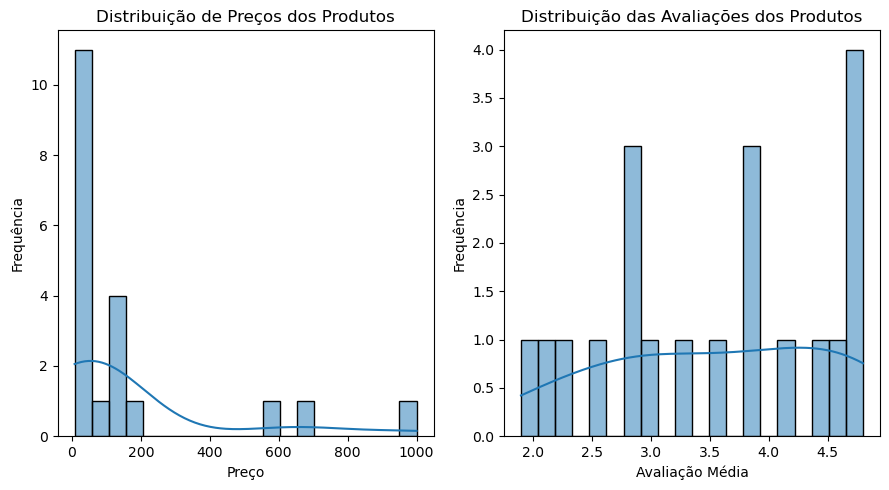

In [359]:
# Histogramas para a distribuição de preços e avaliações
plt.figure(figsize=(9, 5))

# Distribuição de Preços
plt.subplot(1, 2, 1)
sns.histplot(df_products['price'], kde=True, bins=20)
plt.title('Distribuição de Preços dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Frequência')

# Distribuição das Avaliações
plt.subplot(1, 2, 2)
sns.histplot(df_products['avg_rating'], kde=True, bins=20)
plt.title('Distribuição das Avaliações dos Produtos')
plt.xlabel('Avaliação Média')
plt.ylabel('Frequência')

plt.tight_layout()
plt.savefig('img/price_ratings_hist.png')
plt.show()

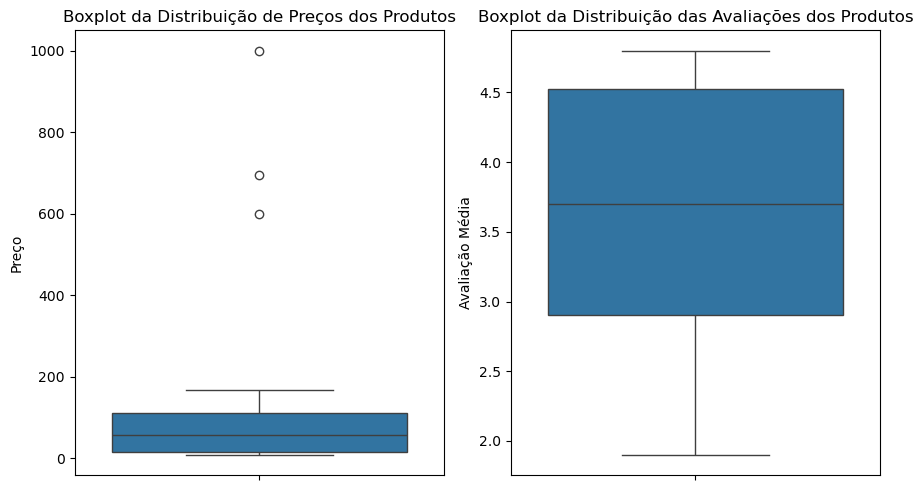

Quartis dos Preços:
25%     15.24
50%     56.49
75%    110.96
Name: price, dtype: float64

Quartis das Avaliações:
25%    2.90
50%    3.70
75%    4.53
Name: avg_rating, dtype: float64


In [377]:
plt.figure(figsize=(9, 5))

# Boxplot da distribuição de Preços
plt.subplot(1, 2, 1)
sns.boxplot(y=df_products['price'])
plt.title('Boxplot da Distribuição de Preços dos Produtos')
plt.ylabel('Preço')

# Boxplot da distribuição das Avaliações
plt.subplot(1, 2, 2)
sns.boxplot(y=df_products['avg_rating'])
plt.title('Boxplot da Distribuição das Avaliações dos Produtos')
plt.ylabel('Avaliação Média')

plt.tight_layout()
plt.savefig('img/dist_prices_ratings_boxplot1.png')
plt.show()

# Calculando os quartis para os preços
price_quartiles = df_products['price'].describe()[['25%', '50%', '75%']]

# Calculando os quartis para as avaliações
rating_quartiles = df_products['avg_rating'].describe()[['25%', '50%', '75%']]

print("Quartis dos Preços:")
print(price_quartiles.round(2))

print("\nQuartis das Avaliações:")
print(rating_quartiles.round(2))

### What is the product with highest price? And lowest?

In [361]:
# Encontrando o produto com maior preço
max_price_product = df_products.loc[df_products['price'].idxmax()]

# Encontrando o produto com menor preço
min_price_product = df_products.loc[df_products['price'].idxmin()]

print("Produto com maior preço:")
print(max_price_product[['id', 'title', 'price', 'category', 'avg_rating', 'count_ratings']])

print("\nProduto com menor preço:")
print(min_price_product[['id', 'title', 'price', 'category', 'avg_rating', 'count_ratings']])

Produto com maior preço:
id                                                              14
title            Samsung 49-Inch CHG90 144Hz Curved Gaming Moni...
price                                                       999.99
category                                               electronics
avg_rating                                                     2.2
count_ratings                                                  140
Name: 13, dtype: object

Produto com menor preço:
id                                               19
title            Opna Women's Short Sleeve Moisture
price                                          7.95
category                           women's clothing
avg_rating                                      4.5
count_ratings                                   146
Name: 18, dtype: object


### Median price per category

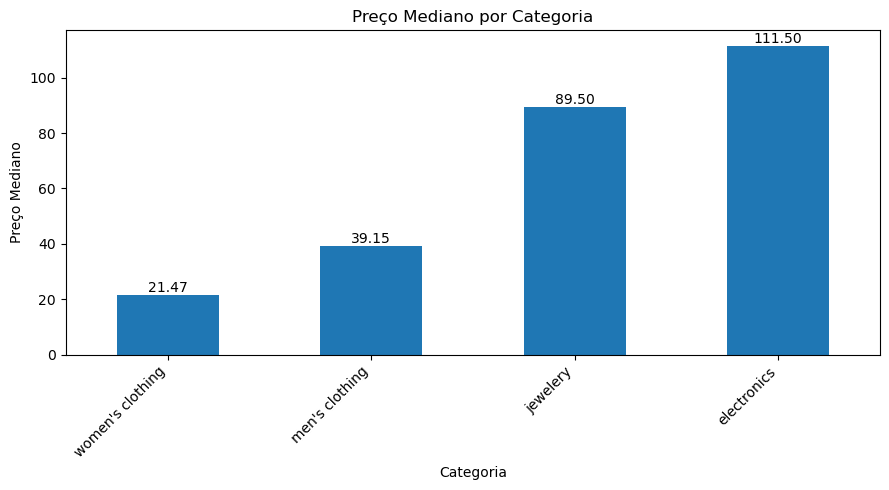

In [362]:
# Calculando o preço mediano por categoria
median_price_by_category = df_products.groupby('category')['price'].median().sort_values()

# Criando o gráfico de barras
plt.figure(figsize=(9, 5))
ax = median_price_by_category.plot(kind='bar')
plt.title('Preço Mediano por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Preço Mediano')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores medianos acima de cada barra
for index, value in enumerate(median_price_by_category):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('img/median_prices_per_category.png')
plt.show()

### Median rates per category

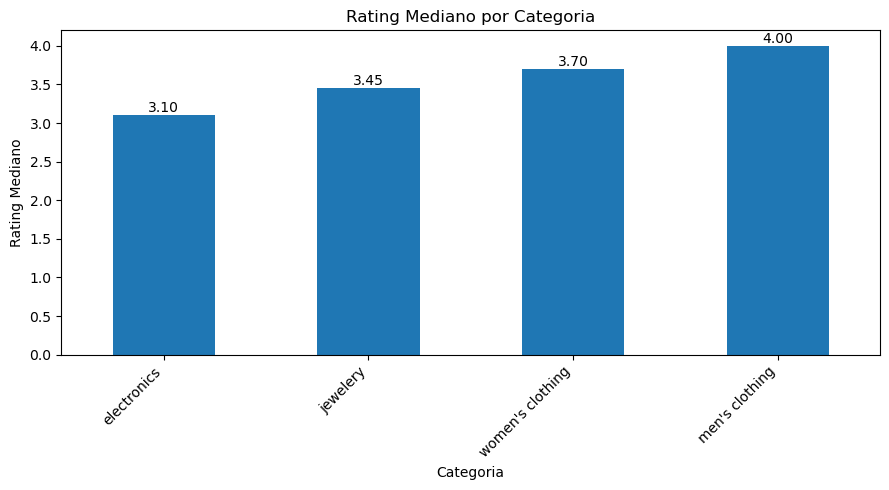

In [363]:
# Calculando a mediana dos ratings por categoria
median_rating_by_category = df_products.groupby('category')['avg_rating'].median().sort_values()

# Criando o gráfico de barras
plt.figure(figsize=(9, 5))
ax = median_rating_by_category.plot(kind='bar')
plt.title('Rating Mediano por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Rating Mediano')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores medianos acima de cada barra
for index, value in enumerate(median_rating_by_category):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('img/median_ratings_per_category.png')
plt.show()

### Median number of ratings per category

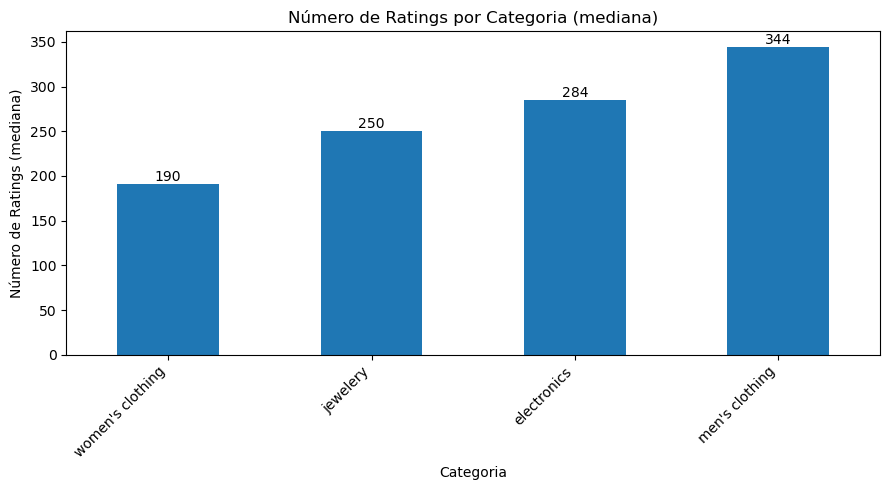

In [364]:
# Calculando a mediana do número de ratings por categoria
median_count_ratings_by_category = df_products.groupby('category')['count_ratings'].median().sort_values()

# Criando o gráfico de barras
plt.figure(figsize=(9, 5))
ax = median_count_ratings_by_category.plot(kind='bar')
plt.title('Número de Ratings por Categoria (mediana)')
plt.xlabel('Categoria')
plt.ylabel('Número de Ratings (mediana)')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores medianos acima de cada barra
for index, value in enumerate(median_count_ratings_by_category):
    ax.text(index, value, f'{value:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('img/median_number_of_ratings_per_category.png')
plt.show()

### What is the product with most ratings?

In [365]:
# Encontrando o produto com o maior número de ratings
product_with_most_ratings = df_products.loc[df_products['count_ratings'].idxmax()]

print(product_with_most_ratings[['id', 'title', 'price', 'category', 'avg_rating', 'count_ratings']])

id                                                              17
title            Rain Jacket Women Windbreaker Striped Climbing...
price                                                        39.99
category                                          women's clothing
avg_rating                                                     3.8
count_ratings                                                  679
Name: 16, dtype: object


### What are the median rating per category adjusting for number of ratings?

**Wheighted Average Rating Metric**
- this metric gives more wheight to product with more ratings
- more ratings = more robust rating

In [366]:
# Adicionando uma pequena constante para evitar problemas com zero ratings
epsilon = 1e-10

# Calculando a média ponderada das avaliações
df_products['weighted_rating'] = (df_products['avg_rating'] * df_products['count_ratings']) / (df_products['count_ratings'] + epsilon)

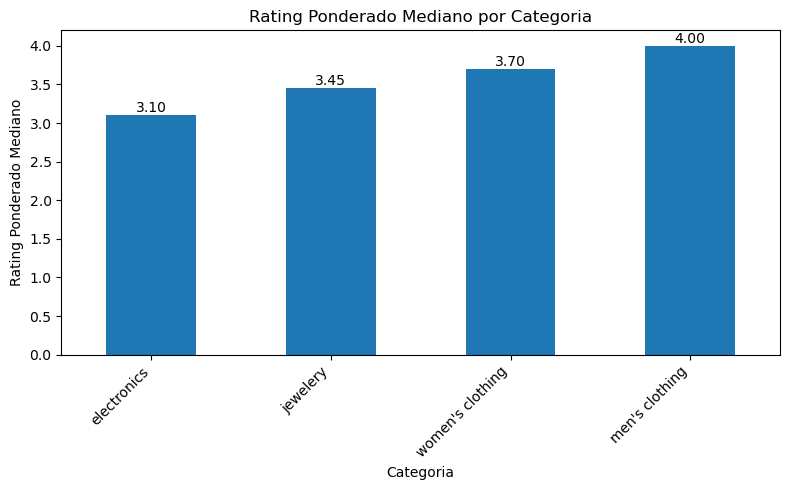

In [367]:
# Calculando a média ponderada dos ratings por categoria
weighted_rating_by_category = df_products.groupby('category')['weighted_rating'].median().sort_values()

# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
ax = weighted_rating_by_category.plot(kind='bar')
plt.title('Rating Ponderado Mediano por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Rating Ponderado Mediano')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores medianos acima de cada barra
for index, value in enumerate(weighted_rating_by_category):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('img/median_wheighted_ratings_per_category.png')
plt.show()

### What are the 5 highest rated product adjusting for number of ratings?

In [368]:
# Ordenando os produtos pela métrica de ratings ponderada
top_products = df_products.sort_values(by='weighted_rating', ascending=False)

print(top_products[['title', 'weighted_rating']].head())

                                                title  weighted_rating
11  WD 4TB Gaming Drive Works with Playstation 4 P...              4.8
10  Silicon Power 256GB SSD 3D NAND A55 SLC Cache ...              4.8
2                                  Mens Cotton Jacket              4.7
17        MBJ Women's Solid Short Sleeve Boat Neck V               4.7
4   John Hardy Women's Legends Naga Gold & Silver ...              4.6


## Cart Analysis

- Orders in a period = how many carts in a time period
- Total sold by product
- Total sold by product through time
- Number of products per cart
- Average ticket per cart
- Correlation between number of products per cart and avg ticket
- Most bought product

### Orders through time

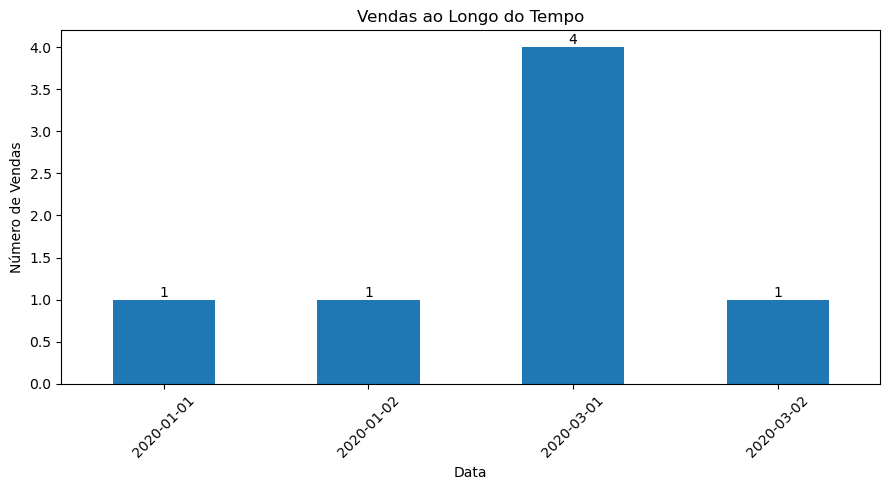

In [369]:
# Convertendo a coluna 'date' para datetime
df_carts['date'] = pd.to_datetime(df_carts['date']) # o pandas converte 'datetime' para 'object' ao salvar para csv

# Contando o número de vendas por data
sales_per_day = df_carts.groupby(df_carts['date'].dt.date).size()

# Criando o gráfico de barras para vendas ao longo do tempo
plt.figure(figsize=(9, 5))
ax = sales_per_day.plot(kind='bar')
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()

# Adicionando valores acima de cada barra
for index, value in enumerate(sales_per_day):
    ax.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('img/daily_sales.png')
plt.show()

Weekly sales:

/tmp/ipykernel_836/618785488.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sales_per_week = df_carts.groupby(df_carts['date'].dt.to_period('W')).size()


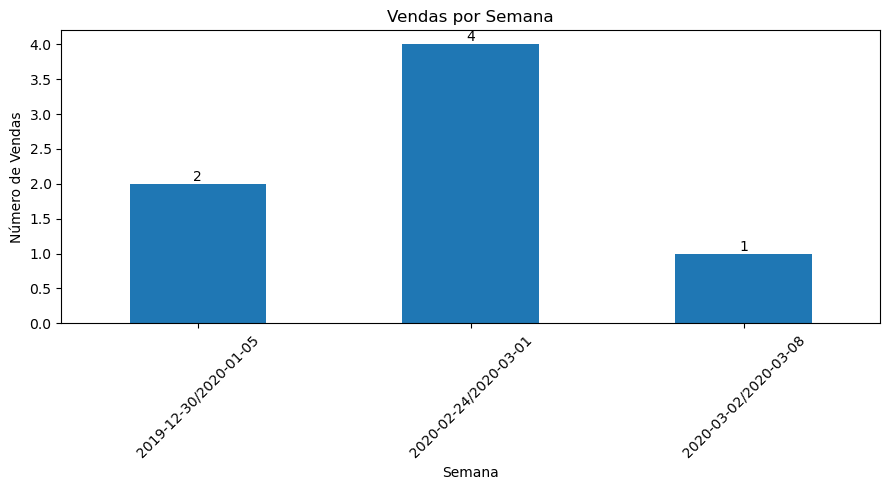

In [370]:
# Convertendo a coluna 'date' para datetime, caso não tenha sido feito ainda
# df_carts['date'] = pd.to_datetime(df_carts['date'])

# Agrupando por semanas
sales_per_week = df_carts.groupby(df_carts['date'].dt.to_period('W')).size()

# Criando o gráfico de barras para vendas por semana
plt.figure(figsize=(9, 5))
ax1 = sales_per_week.plot(kind='bar')
plt.title('Vendas por Semana')
plt.xlabel('Semana')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()

# Adicionando valores acima de cada barra
for index, value in enumerate(sales_per_week):
    ax1.text(index, value, str(value), ha='center', va='bottom')
plt.savefig('img/weekly_sales.png')
plt.show()

Monthly sales:

/tmp/ipykernel_836/198363789.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sales_per_month = df_carts.groupby(df_carts['date'].dt.to_period('M')).size()


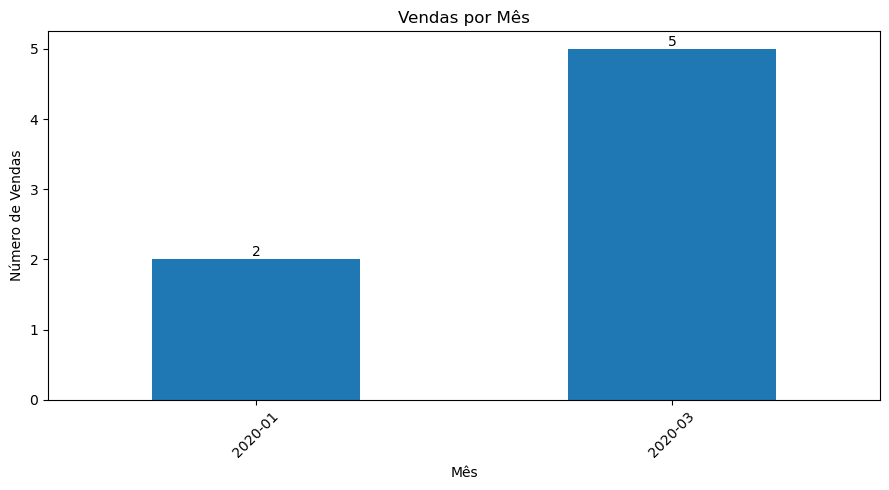

In [371]:
# Agrupando por meses
sales_per_month = df_carts.groupby(df_carts['date'].dt.to_period('M')).size()

# Criando o gráfico de barras para vendas por mês
plt.figure(figsize=(9, 5))
ax2 = sales_per_month.plot(kind='bar')
plt.title('Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()

# Adicionando valores acima de cada barra
for index, value in enumerate(sales_per_month):
    ax2.text(index, value, str(value), ha='center', va='bottom')
plt.savefig('img/monthly_sales.png')
plt.show()

### Total Sold by Category

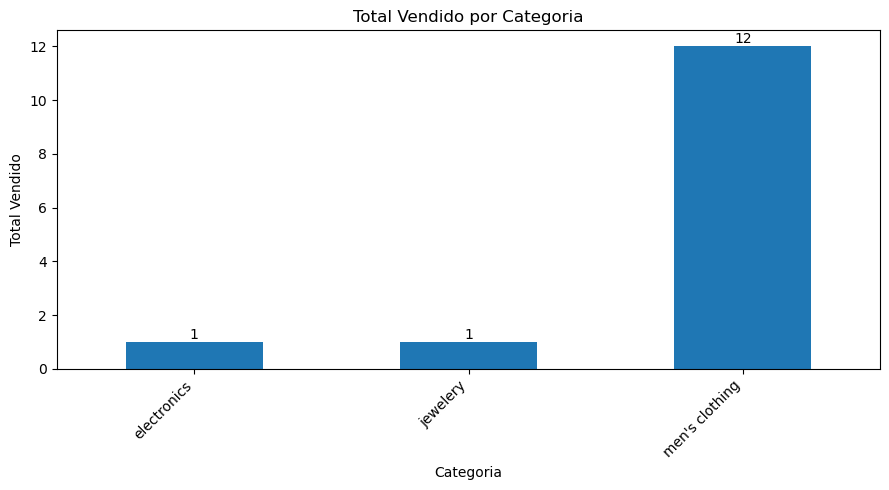

In [372]:
# Reorganizando df_carts para um formato longo, para que cada linha corresponda a um produto vendido
products_columns = [f'product_{i}' for i in range(1, 21)]
df_carts_long = df_carts.melt(id_vars='date', value_vars=products_columns, var_name='product_col', value_name='product_id')

# Contando o total vendido por produto
product_sales = df_carts_long['product_id'].value_counts().reset_index()
product_sales.columns = ['product_id', 'quantity']

# Merge com df_products para obter a categoria
df_sales_by_category = product_sales.merge(df_products[['id', 'category']], left_on='product_id', right_on='id', how='left')

# Somando o total vendido por categoria
total_sold_by_category = df_sales_by_category.groupby('category')['quantity'].sum().sort_values()

# Criando o gráfico de barras para total vendido por categoria
plt.figure(figsize=(9, 5))
ax = total_sold_by_category.plot(kind='bar')
plt.title('Total Vendido por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Total Vendido')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adicionando valores acima de cada barra
for index, value in enumerate(total_sold_by_category):
    ax.text(index, value, str(value), ha='center', va='bottom')

plt.savefig('img/total_sold_by_category.png')
plt.show()

### Total Sold by Category through time

<Figure size 900x500 with 0 Axes>

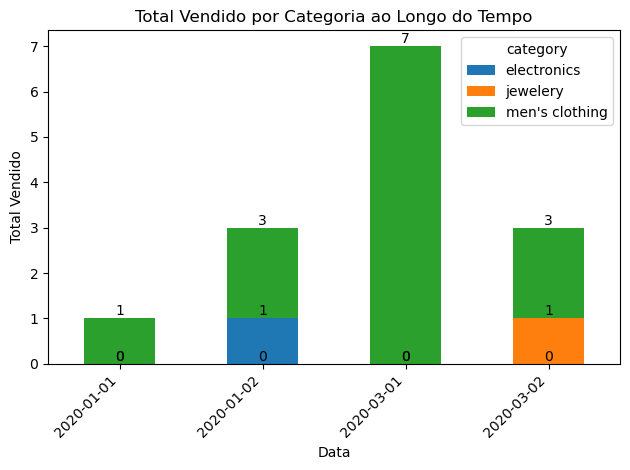

In [373]:
# Reorganizando df_carts para um formato longo, para que cada linha corresponda a um produto vendido
df_carts_long = df_carts.melt(id_vars='date', value_vars=products_columns, var_name='product_col', value_name='product_id')

# Merge com df_products para obter a categoria
total_sold_by_category_date = df_carts_long.merge(df_products[['id', 'category']], left_on='product_id', right_on='id', how='left')
total_sold_by_category_date = total_sold_by_category_date.groupby(['date', 'category']).size().unstack(fill_value=0)

# Convertendo o formato do eixo X para YYYY-MM-DD
total_sold_by_category_date.index = pd.to_datetime(total_sold_by_category_date.index).strftime('%Y-%m-%d')

# Filtrando categorias com vendas > 0 em cada data específica
filtered_data = total_sold_by_category_date.loc[
    total_sold_by_category_date.sum(axis=1) > 0, 
    (total_sold_by_category_date != 0).any(axis=0)
]

# Criando o gráfico de barras para total vendido por categoria ao longo do tempo
plt.figure(figsize=(9, 5))
ax = filtered_data.plot(kind='bar', stacked=True)
plt.title('Total Vendido por Categoria ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total Vendido')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adicionando valores acima de cada barra
for c in ax.containers:
    ax.bar_label(c, label_type='edge')

plt.savefig('img/total_sold_by_category_time.png')
plt.show()

### Number of products by cart

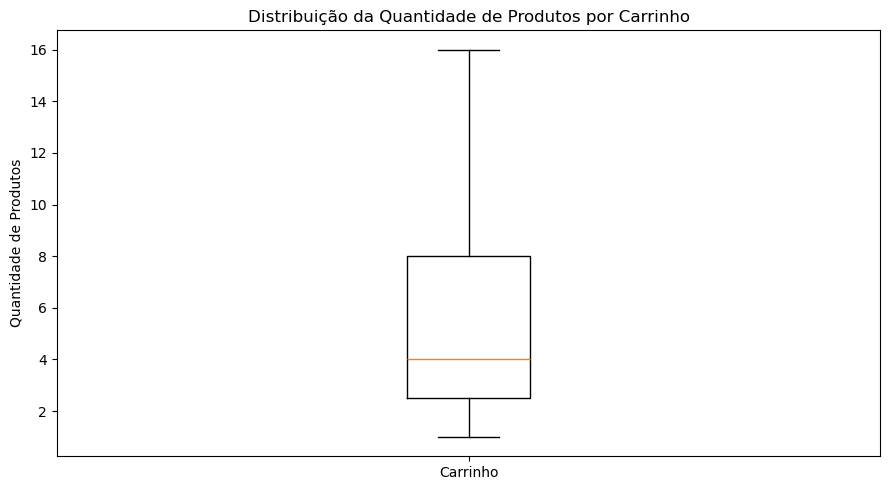

Quartis da quantidade de produtos por carrinho:
1º Quartil (25%): 2.50
2º Quartil (Mediana, 50%): 4.00
3º Quartil (75%): 8.00


In [374]:
import matplotlib.pyplot as plt

# Calculando a quantidade total de produtos por carrinho
df_carts['total_items'] = df_carts[products_columns].sum(axis=1)

# Criando o boxplot vertical
plt.figure(figsize=(9, 5))
plt.boxplot(df_carts['total_items'])
plt.title('Distribuição da Quantidade de Produtos por Carrinho')
plt.ylabel('Quantidade de Produtos')
plt.xticks([1], ['Carrinho'])
plt.tight_layout()
plt.savefig('img/boxplot_total_items_per_cart.png')
plt.show()

# Imprimindo a quantidade em cada quartil
quartiles = df_carts['total_items'].quantile([0.25, 0.5, 0.75])
print(f'Quartis da quantidade de produtos por carrinho:')
print(f'1º Quartil (25%): {quartiles[0.25]:.2f}')
print(f'2º Quartil (Mediana, 50%): {quartiles[0.5]:.2f}')
print(f'3º Quartil (75%): {quartiles[0.75]:.2f}')

### Average value by cart

In [375]:
# Passo 1: Transformar os nomes das colunas dos produtos para obter os IDs
# Não há coluna com ids dos produtos em 'df_carts'. Os ids estão no nome das colunas de produto. Ex: 'product_1' é o produto com id = 1
product_columns = [col for col in df_carts.columns if col.startswith('product_')]
product_ids = [int(col.split('_')[1]) for col in product_columns]

# Passo 2: Relacionar os IDs dos produtos com a tabela 'products' para obter os preços
product_prices = df_products[['id', 'price']].set_index('id')['price']

# Passo 3: Calcular o valor total de cada carrinho
# Criar um DataFrame com os preços dos produtos
df_carts_prices = df_carts.copy()
for i, prod_id in enumerate(product_ids, start=1):
    df_carts_prices[f'product_{i}_price'] = df_carts_prices[f'product_{i}'] * product_prices[prod_id]

# Calcular o total de cada carrinho
df_carts_prices['total_value'] = df_carts_prices[[f'product_{i}_price' for i in range(1, len(product_ids) + 1)]].sum(axis=1)

# Passo 4: Calcular o valor médio por carrinho
average_value_per_cart = df_carts_prices['total_value'].mean()

print(f'Valor médio por carrinho: {average_value_per_cart:.2f}')

Valor médio por carrinho: 670.18


### Correlation between number of products x average value by chart

In [376]:
# Passo 1: Calcular a quantidade total de produtos no carrinho
df_carts_prices['total_quantity'] = df_carts[product_columns].sum(axis=1)

# Passo 2: Calcular a correlação entre a quantidade total de produtos e o valor total do carrinho
correlation = df_carts_prices[['total_quantity', 'total_value']].corr().loc['total_quantity', 'total_value']

print(f'Correlação entre a quantidade total de produtos e o valor total do carrinho: {correlation:.2f}')

Correlação entre a quantidade total de produtos e o valor total do carrinho: 0.94


Regressão entre quantidade de produtos e valor do carrinho:

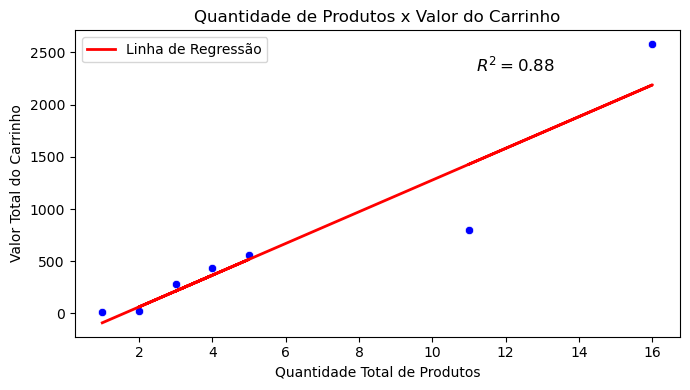

In [171]:
# Passo 1: Calcular a quantidade total de produtos no carrinho
df_carts_prices['total_quantity'] = df_carts[product_columns].sum(axis=1)

# Passo 2: Ajustar o modelo de regressão linear
X = df_carts_prices[['total_quantity']]
y = df_carts_prices['total_value']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Passo 3: Calcular o valor do R^2
r2 = r2_score(y, y_pred)

# Passo 4: Criar o gráfico de dispersão com a linha de regressão
plt.figure(figsize=(7, 4))
sns.scatterplot(x='total_quantity', y='total_value', data=df_carts_prices, color='blue')
plt.plot(df_carts_prices['total_quantity'], y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.title('Quantidade de Produtos x Valor do Carrinho')
plt.xlabel('Quantidade Total de Produtos')
plt.ylabel('Valor Total do Carrinho')
plt.legend()

# Exibir o valor de R^2 no gráfico
plt.text(x=df_carts_prices['total_quantity'].max()*0.7, y=df_carts_prices['total_value'].max()*0.9, 
         s=f'$R^2 = {r2:.2f}$', fontsize=12, color='black')

plt.tight_layout()
plt.savefig('img/order_size_vs_value_regression.png')
plt.show()

### Most bought product

In [183]:
# Passo 1: Soma a quantidade de valores em cada coluna com nome 'product' de df_carts
product_columns = [col for col in df_carts.columns if col.startswith('product_')]
sums = df_carts[product_columns].sum()

# Passo 2: Extrai a coluna com nome 'product' com a maior soma
max_sum_column = sums.idxmax()

# Passo 3: Esse é o produto mais vendido
# Passo 4: Extrai o id do produto a partir do nome da coluna
product_id = int(max_sum_column.split('_')[1])

# Passo 5: Busca em df_products o nome desse produto e seu preço
product_info = df_products[df_products['id'] == product_id][['title', 'price']]

# Passo 6: Imprime os dados obtidos no passo 5
if not product_info.empty:
    product_name = product_info['title'].values[0]
    product_price = product_info['price'].values[0]
    print(f'O produto mais vendido é "{product_name}" com o preço de R${product_price:.2f}.')
else:
    print('Produto não encontrado em df_products.')

O produto mais vendido é "Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops" com o preço de R$109.95.


## Users Analysis

- Geographic distribution = where are they located?
- Number of cities with most users (ranking or map with proportional bubbles)
- What are cities with most active users = frequent buyers

### Where the users are located?

In [224]:
df_users = pd.read_csv('data/df_users_cleaned.csv')

In [226]:
import folium

# Criar um mapa base centrado na média das coordenadas
map_center = [df_users['lat'].mean(), df_users['long'].mean()]
m = folium.Map(location=map_center, zoom_start=3)

# Adicionar marcadores para cada usuário
for idx, row in df_users.iterrows():
    popup_text = f"City: {row['city']}<br>Latitude: {row['lat']}<br>Longitude: {row['long']}"
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=popup_text,  # Exibindo a cidade, lat e long ao clicar no marcador
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Salvar e exibir o mapa
#m.save('img/users_location_map_with_details.html')
m

#### Adjusting maps
- Apparently, the geographic coordinates from the API are incorrect. We won't be able to use them in our analysis.
- Let's try to proceed with the analysis using the **zipcode.**
- Even the zipcodes are incorrect. 
- We will try to proceed **converting the address to a lat/long code** using geopy and then make the maps.
- Some **street names** and numbers are incorrect. So we should **use only the cities** to make the maps.

In [ ]:
# Obtendo coordenadas corretas a partir do nome da cidade
# Inicializar o geolocalizador
geolocator = Nominatim(user_agent="joaomj") # é importante utilizar um user_agent específico para evitar bloqueios pela API de mapas.

# Fazendo a cópia para não modificar o df original
df1 = df_users.copy()

# Corrigir as coordenadas do dataframe usando a função 'get_coordinates'
df1[['lat', 'long']] = df1['city'].apply(lambda city: pd.Series(get_coordinates(city)))

In [257]:
# Substituir as coordenadas incorretas de 'df_users' pelas corretas de 'df1'

# Passo 1: Mesclar df_users com df1 usando a coluna 'id' para obter as coordenadas corretas
df_merged = df_users.merge(df1[['id', 'lat', 'long']], on='id', suffixes=('', '_new'))

# Passo 2: Substituir as coordenadas antigas pelas novas
df_merged['lat'] = df_merged['lat_new']
df_merged['long'] = df_merged['long_new']

# Passo 3: Remover as colunas desnecessárias
df_users = df_merged.drop(columns=['lat_new', 'long_new'])

# Exibir os primeiros registros para verificação
print(df_users.head())

# Salvar df_users com as coordenadas corretas
df_users.to_csv('data/df_users_coord_corrected.csv', index=False)

   id            name           phone        lat       long         city  \
0   1        John Doe  1-570-236-7033  34.802243 -87.549346     Kilcoole   
1   2  David Morrison  1-570-236-7033  34.802243 -87.549346     Kilcoole   
2   3      Kevin Ryan  1-567-094-1345  34.133533 -86.877927      Cullman   
3   4       Don Romer  1-765-789-6734  29.424600 -98.495141  San Antonio   
4   5    Derek Powell  1-956-001-1945  29.424600 -98.495141  San Antonio   

             street  number     zipcode               email   username  \
0          New Road    7682  12926-3874      john@gmail.com      johnd   
1         Lovers Ln    7267  12926-3874  morrison@gmail.com   mor_2314   
2        Frances Ct      86  29567-1452     kevin@gmail.com  kevinryan   
3  Hunters Creek Dr    6454  98234-1734       don@gmail.com     donero   
4          Adams St     245  80796-1234     derek@gmail.com      derek   

    password  
0    m38rmF$  
1     83r5^_  
2  kev02937@  
3     ewedon  
4   jklg*_56  


In [231]:
# Criar o mapa centralizado na média das coordenadas
map_center = [df1['lat'].mean(), df1['long'].mean()]
user_map = folium.Map(location=map_center, zoom_start=4)

# Adicionar pontos ao mapa
for _, row in df1.iterrows():
    if pd.notna(row['lat']) and pd.notna(row['long']):
        popup_text = f"City: {row['city']}<br>Latitude: {row['lat']}<br>Longitude: {row['long']}"
        folium.Marker(
            location=[row['lat'], row['long']],
            popup=popup_text
        ).add_to(user_map)

# Salvar e exibir o mapa
user_map.save('img/users_location_map.html')
user_map

### Number of users per city

In [237]:
# Contar o número de usuários por cidade
city_counts = df1['city'].value_counts()

# Criar o mapa centralizado na média das coordenadas das cidades
map_center = [df1['lat'].mean(), df1['long'].mean()]
bubble_map = folium.Map(location=map_center, zoom_start=4)

# Definir um fator de escala para aumentar as bolhas
scale_factor = 5

# Adicionar bolhas proporcionais ao número de usuários
for city, count in city_counts.items():
    # Obter coordenadas da cidade
    city_data = df1[df1['city'] == city].iloc[0]
    location = [city_data['lat'], city_data['long']]
    
    # Adicionar bolha no mapa
    folium.CircleMarker(
        location=location,
        radius=(count*scale_factor),  # Ajuste o divisor para tamanho adequado das bolhas
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"City: {city}<br>Number of Users: {count}<br>"
    ).add_to(bubble_map)

# Salvar e exibir o mapa
bubble_map.save('img/users_bubble_map.html')

bubble_map

### Where is the most engaged user?

In [238]:
# Passo 1: Encontrar o usuário que fez o maior número de compras
# Somar o número total de compras por usuário
user_purchase_counts = df_carts.groupby('userId')['num_products'].sum()

# Encontrar o usuário com o maior número de compras
top_user_id = user_purchase_counts.idxmax()
top_user_purchases = user_purchase_counts.max()

# Passo 2: Localizar a cidade desse usuário
top_user_city = df_users[df_users['id'] == top_user_id]['city'].values[0]

# Exibir o resultado
print(f"O usuário que fez mais compras (ID: {top_user_id}) está na cidade: {top_user_city}")

O usuário que fez mais compras (ID: 1) está na cidade: Kilcoole


# **References**

- **FakeStore API:** https://fakestoreapi.com/
- **Nominatim usage policy:** https://operations.osmfoundation.org/policies/nominatim/